# *The missing link:*
# CAS Applied Data Science Final Project
# Matthias Rinderknecht

## Notebook 2: Linking two dataframes using the Linktransformer package

### Setup and Imports

In [ ]:
!pip install linktransformer

In [2]:
##Some imports handy for using dataframes
import linktransformer as lt
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt

### Read dataframes

In [5]:
from google.colab import files

# Read left (basec) df
df1 = pd.read_csv("/content/BASEC_with_ICTRP_3054x12_basec.csv")

# Read right (ictrp) df
df2 = pd.read_csv("/content/BASEC_with_ICTRP_3054x11_ictrp.csv")

#replace "Null"in basecId column with ""
df1 = df1.replace(["NULL", "NaN"], "")
df2 = df2.replace(["NULL", "NaN"], "")

#Shuffle the df's:
df1 = df1.sample(frac=1).reset_index(drop=True)
df2 = df2.sample(frac=1).reset_index(drop=True)

### Link the two dataframes

In [ ]:
MODEL="sentence-transformers/paraphrase-multilingual-mpnet-base-v2"
#MODEL="/content/models/linkage" # the fine-tuned model

df_lm_matched = lt.merge(df1, df2, merge_type='1:1', on=None, model=MODEL, left_on=["layTitle","layTitle", "disease", "intervention"], right_on=["scientificTitle","publicTitle", "healthConditions", "interventions"])

##Linking using k top matches:
#df_lm_matched = lt.merge_knn(df1, df2, on=None, model=MODEL, left_on=["layTitle","layTitle", "disease", "intervention"], right_on=["scientificTitle","publicTitle", "healthConditions", "interventions"], k=3)

# Analyse linked dataframes

### Print overall match percentage and match percentage per bin as well as counts per bin

Number of rows in df: 3054
Number of correct matches: 1921
Overall match percentage: 62.9011132940406


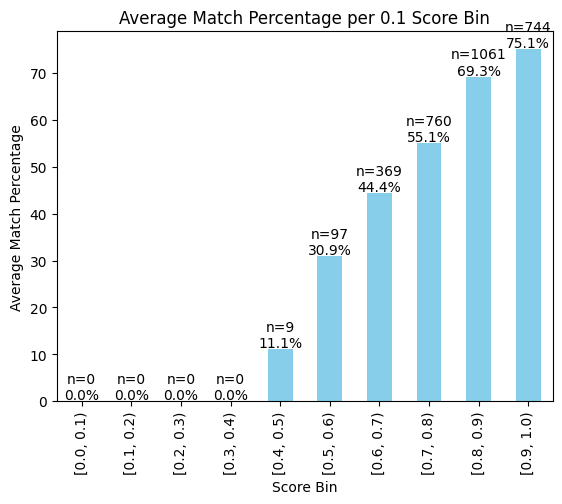

In [9]:
df = df_lm_matched

# Print number of rows in df
print("Number of rows in df:", len(df))

# Print number of correct matches between 'whoId' and 'trialId'
correct_matches = (df['whoId'] == df['trialId']).sum()
print("Number of correct matches:", correct_matches)

# Calculate the percentage of rows where 'whoid' matches 'trialid' exactly
match_percentage = (df['whoId'] == df['trialId']).mean() * 100
print("Overall match percentage:", match_percentage)

# Create bins of size 0.1 along the 'score' column
bins = [i / 10 for i in range(0, 11)]

# Cut the 'score' column into bins
df['score_bin'] = pd.cut(df['score'], bins=bins, right=False)

# Cut the 'score' column into bins and calculate average match percentage for each bin
bin_means = df.groupby(pd.cut(df['score'], bins=bins, right=False)) \
    .apply(lambda x: (x['whoId'] == x['trialId']).mean() * 100)

# Plotting
fig, ax = plt.subplots()
bin_means.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Average Match Percentage per 0.1 Score Bin')
ax.set_xlabel('Score Bin')
ax.set_ylabel('Average Match Percentage')

# Display counts (n) on each bar with "n=" and increased space
for p, n in zip(ax.patches, df['score_bin'].value_counts().sort_index()):
    ax.annotate(f"n={n}\n{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='black')

plt.show()

### Output incorrect matches for **k=1** matching

In [ ]:
# show all rows where matching was incorrect:
incorrect_df = df_lm_matched[df_lm_matched['whoId'] != df_lm_matched['trialId']]
incorrect_df.head(50)

,Unnamed: 0,basecId,snctpId,whoId,layTitle,laySummary,disease,intervention,inclusionCriteria_x,exclusionCriteria_x,...,interventions,primarySponsor,healthConditions,publicContactAffiliation,scientificContactAffiliation,scientificTitleCorr,publicTitleCorr,id_lt_y,score,score_bin
0,147,2022-D0017,SNCTP000005000,DRKS00024063,Studie zur Sicherheit und Leistungsfähigkeit d...,Es werden Daten zur Sicherheit und Leistungsäh...,Venöse Flussbehinderung in den Beinen,Stentimplantation in den Beinvenen,"Männer und Frauen über 18 Jahre alt, BMI klein...","Allergie gegen Nitinol, Symptome verursacht du...",...,Device: Stent,Biotronik CRC Inc.,Coronary Artery Disease,NaN,NaN,vascular implant safety and efficacy study,vascular implant safety and efficacy study,2730,0.689504,"[0.6, 0.7)"
10,1989,2019-00765,SNCTP000003626,NCT03584516,Eine Phase-III-Studie von Itacitinib oder Plac...,Das Ziel dieser Forschungsstudie ist zu beurte...,Graft-versus-Host-Krankheit (immunologische Re...,Untersuchungen:\r\n- Patienteninformation und ...,"1. Männlich oder weiblich, 18 Jahre alt oder a...",1. mehr als eine frühere allo-hämatopoetische ...,...,Drug: Itacitinib;Drug: Placebo;Drug: Prednison...,Incyte Corporation,Graftversushost Disease GVHD,Incyte Corporation,Incyte Corporation,"gravitas-301: a randomized, double-blind, plac...",gravitas-301: a study of itacitinib or placebo...,1424,0.855696,"[0.8, 0.9)"
22,1670,2017-00974,SNCTP000002276,NCT03192332,Direkte Entfernung von Blutgerinnseln im Gehir...,Die Studie untersucht die Behandlung bei Patie...,"Aktuer Hirnschlag (ischämischer Hirninfarkt), ...",Direkte Entfernung des Blutgerinnsels im Hirng...,Ischämischen Hirninfarkt \r\nüber 18 Jahre alt...,Akute Hirnblutung \r\nVorbehandlung mit Blutge...,...,Device: Thrombectomy;Other: Best medical care,University Hospital Heidelberg,Stroke AcuteCerebral StrokeCerebrovascular Str...,"Coordination and Project Management Tension, N...","Coordination and Project Management Tension, N...",efficacy and safety of thrombectomy in stroke ...,efficacy and safety of thrombectomy in stroke ...,781,0.721820,"[0.7, 0.8)"
26,2746,2019-02146,SNCTP000003821,NCT04631003,Entwicklung einer Untersuchungstechnik zur Prü...,Wir wollen mit dieser Studie eine Untersuchung...,Untersucht werden zusätzliche Bandverletzungen...,Die Patienten erhalten zunächst alle eine Schn...,"•\tPatienten mit einem Bruch der Speiche, welc...",•\tAlter <16 und > 80 Jahre\r\n•\tGegenanzeige...,...,NaN,University of Zurich,Hand Injuries,Plastic surgery and Handsurgery USZ;Plastic su...,Plastic surgery and Handsurgery USZ;Plastic su...,three-dimensional kinematic motion analysis of...,three-dimensional kinematic motion analysis of...,630,0.662698,"[0.6, 0.7)"
28,796,NaN,SNCTP000001569,NCT02234843,EINSTEIN junior Phase III: orales Rivaroxaban ...,"Das Ziel dieser Studie ist es, die Wirksamkeit...",venöser Thromboembolismus,Therapie mit Rivaroxaban,-Kinder von 6 Monaten bis <18 Jahre mit einem ...,-aktive Blutung oder hohes Blutungsrisiko\n-re...,...,"Drug: Rivaroxaban (Xarelto, BAY59-7939)",Bayer,Venous Thromboembolism,Bayer,Bayer,"30-day, single-arm study of the safety, effica...",einstein junior phase ii: oral rivaroxaban in ...,1189,0.869599,"[0.8, 0.9)"
34,1516,2017-00116,SNCTP000002129,NCT03006068,"Multizentrische, offene Erweiterungsstudie (op...",Bei der Colitis ulcerosa (Cu) handelt es sich ...,Colitis ulcerosa (Cu),Alle Patienten erhalten ab Woche 0 über einen ...,"1. Studienteilnehmer, die am Ende (Woche 8) de...",1. Frauen mit einem positiven Schwangerschafts...,...,Drug: Etrolizumab,Hoffmann-La Roche,Ulcerative Colitis,Hoffmann-La Roche,Hoffmann-La Roche,an open-label extension and safety monitoring ...,study for participants with ulcerative colitis...,76,0.812829,"[0.8, 0.9)"
44,76,2017-00813,SNCTP000003873,DRKS00012609,Régulation Physiologique de l’Acouphène Chronique,Le but de la recherche est d’étudier l’acouphè...,acouphène,•\tIl vous sera demandé de vous rendre à l’hôp...,1 Être âgé de 18 à 8

### Output incorrect matches for **k>1** matching

In [ ]:
# Create an empty DataFrame to store incorrect rows
incorrect_df = pd.DataFrame(columns=df_lm_matched.columns)

# Group the DataFrame by snctpId
grouped = df_lm_matched.groupby('snctpId')

# Iterate over each group
for snctpId, group in grouped:
    # Check if there is no match between whoId and trialId
    if not any(group['whoId'] == group['trialId']):
        # If there's no match, add all rows in this group to incorrect_df
        incorrect_df = pd.concat([incorrect_df, group])

# Reset index of incorrect_df
incorrect_df.reset_index(drop=True, inplace=True)

incorrect_df.head(50)

,basecId,snctpId,whoId,layTitle,laySummary,disease,intervention,inclusionCriteria_x,exclusionCriteria_x,studysites,...,inclusionCriteria_y,exclusionCriteria_y,interventions,primarySponsor,healthConditions,publicContactAffiliation,scientificContactAffiliation,id_lt_y,score,score_bin
0,NaN,SNCTP000000058,NCT02041533,Eine klinische Studie mit Nivolumab im Verglei...,"Das Ziel dieser Studie ist es herauszufinden, ...",Nicht-kleinzelliger Lungenkrebs im Stadium IV ...,Arzneimittel (Biologikum): Nivolumab\nArzneimi...,Wichtigste Einschlusskriterien:\n- Leistungsst...,Wichtigste Ausschlusskriterien:\n- Patienten m...,"Chur, Zürich, Lausanne",...,Patienten mit histologisch bestätigtem NSCLC (...,Patienten mit unbehandelten ZNS-Metastasen; Au...,Drug: Nivolumab;Drug: Ipilimumab;Drug: Carbopl...,Bristol-Myers Squibb,Non-Small Cell Lung Cancer,Bristol-Myers Squibb,Bristol-Myers Squibb,687,0.913749,"[0.9, 1.0)"
1,NaN,SNCTP000000058,NCT02041533,Eine klinische Studie mit Nivolumab im Verglei...,"Das Ziel dieser Studie ist es herauszufinden, ...",Nicht-kleinzelliger Lungenkrebs im Stadium IV ...,Arzneimittel (Biologikum): Nivolumab\nArzneimi...,Wichtigste Einschlusskriterien:\n- Leistungsst...,Wichtigste Ausschlusskriterien:\n- Patienten m...,"Chur, Zürich, Lausanne",...,Einschlusskriterien vor der Operation:\r\n- ve...,Ausschlusskriterien vor der Operation:\r\n- Pa...,Biological: Nivolumab;Drug: Vinorelbine;Drug: ...,Bristol-Myers Squibb,Non-Small Cell Lung Cancer;Non-Small-Cell Lung...,Bristol-Myers Squibb,Bristol-Myers Squibb,1202,0.900434,"[0.9, 1.0)"
2,NaN,SNCTP000000058,NCT02041533,Eine klinische Studie mit Nivolumab im Verglei...,"Das Ziel dieser Studie ist es herauszufinden, ...",Nicht-kleinzelliger Lungenkrebs im Stadium IV ...,Arzneimittel (Biologikum): Nivolumab\nArzneimi...,Wichtigste Einschlusskriterien:\n- Leistungsst...,Wichtigste Ausschlusskriterien:\n- Patienten m...,"Chur, Zürich, Lausanne",...,Männliche und weibliche Patienten (≥18 Jahre)....,"Primitive Peritoneal-, Perikard- und Tunica-Va...",Biological: Nivolumab;Biological: Ipilimumab;D...,Bristol-Myers Squibb,Mesothelioma,Bristol-Myers Squibb,Bristol-Myers Squibb,818,0.898799,"[0.8, 0.9)"
3,NaN,SNCTP000000964,NCT01684423,Oral verabreichtes Rivaroxaban bei Kindern mit...,"Ziel dieser Studie ist es zu untersuchen, ob d...",Venöse Thrombosen (Blutgerinnsel in den Venen),BAY59-7939 / Rivaroxaban / Xarelto,"-Kinder, 6 bis <18 Jahre alt, die wegen einer ...",-aktive Blutung oder hohes Risiko für Blutunge...,"Zürich, Bern, Basel",...,"-pädiatrische Subjekte, über 6 Monate und unte...",-grössere oder klinisch relevante Blutungen vo...,"Drug: Rivaroxaban (Xarelto, BAY59-7939)",Bayer,Venous Thrombosis;Pediatrics,Bayer,Bayer,1684,0.932990,"[0.9, 1.0)"
4,NaN,SNCTP000000964,NCT01684423,Oral verabreichtes Rivaroxaban bei Kindern mit...,"Ziel dieser Studie ist es zu untersuchen, ob d...",Venöse Thrombosen (Blutgerinnsel in den Venen),BAY59-7939 / Rivaroxaban / Xarelto,"-Kinder, 6 bis <18 Jahre alt, die wegen einer ...",-aktive Blutung oder hohes Risiko für Blutunge...,"Zürich, Bern, Basel",...,"-Kinder von 6 Monaten bis <6 Jahre, die midest...",-Aktive Blutungen oder hohes Risiko von Blutun...,"Drug: Rivaroxaban (Xarelto, BAY59-7939)",Bayer,Venous Thromboembolism,Bayer,Bayer,876,0.926799,"[0.9, 1.0)"
5,NaN,SNCTP000000964,NCT01684423,Oral verabreichtes Rivaroxaban bei Kindern mit...,"Ziel dieser Studie ist es zu untersuchen, ob d...",Venöse Thrombosen (Blutgerinnsel in den Venen),BAY59-7939 / Rivaroxaban / Xarelto,"-Kinder, 6 bis <18 Jahre alt, die wegen einer ...",-aktive Blutung oder hohes Risiko für Blutunge...,"Zürich, Bern, Basel",...,-Kinder von 6 Monaten bis <18 Jahre mit einem ...,-aktive Blutung oder hohes Blutungsrisiko\n-re...,"Drug: Rivaroxaban (Xarelto, BAY59-7939);Drug: ...",Bayer,Venous Thromboembolism,Bayer,Bayer,2876,0.922320,"[0.9, 1.0)"
6,NaN,SNCTP000000976,EUCTR2010-022949-17,INOVATYON - Internationale randomisierte Studi...,Die vorliegende Studie will die Sicherhe

### Reorder the columns in the merged dataframe and save them

In [ ]:
# Reorder the columns

new_column_order = [
    "score",
    "snctpId",
    "whoId",
    "trialId",
    "layTitle",
    "scientificTitle",
    "publicTitle",
    "intervention",
    "interventions",
    "disease",
    "healthConditions",
    "laySummary",
    "basecId",
    "inclusionCriteria_x",
    "exclusionCriteria_x",
    "studySitesOther",
    "studysites",
    "tags",
    "id_lt_x",
    "secondaryId",
    "inclusionCriteria_y",
    "exclusionCriteria_y",
    "primarySponsor",
    "secondarySponsors",
    "phase",
    "primaryOutcome",
    "publicContactLastname",
    "publicContactAffiliation",
    "id_lt_y",
    "score_bin"
]
df_new = df_lm_matched[new_column_order]


In [ ]:
#Save the dfs
df_new.to_csv("/content/matched_file_match69.csv", index=False)
incorrect_df.to_csv("/content/incorrect_matches_file_match76.csv", index=False)